# Histology Image

In [43]:
import cv2
import matplotlib.pyplot as plt
import copy

## Load, convert to grayscale, resize

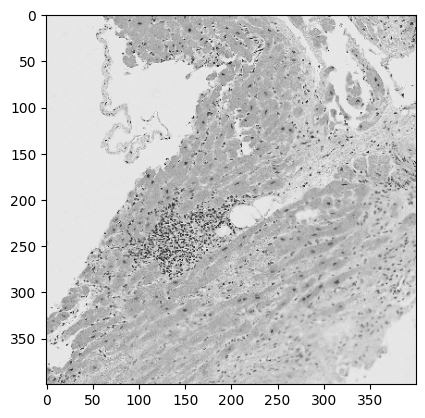

In [44]:
img = cv2.imread("hist.png")
img = cv2.resize(img, (400, 400)) # linear interpolation

orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

## Reduce Noise by Blurring

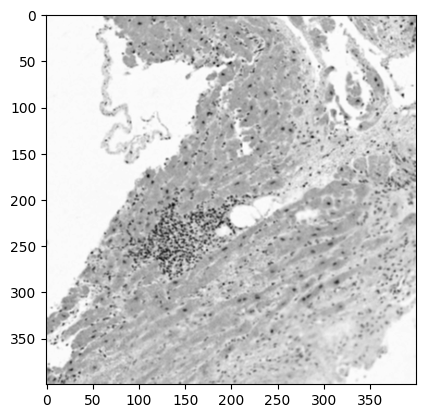

In [45]:
filtered = cv2.GaussianBlur(img, (3, 3), 0)
plt.imshow(filtered, cmap="gray")

## Binarization

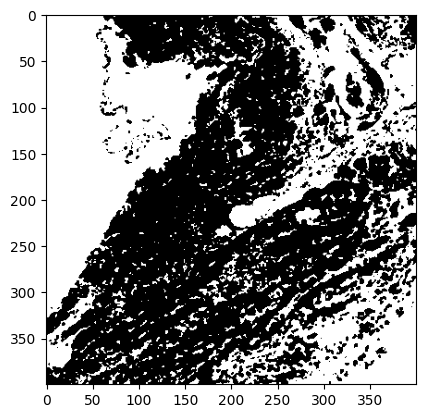

In [46]:
_, bin_img = cv2.threshold(filtered, 0, 255, cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap="gray")

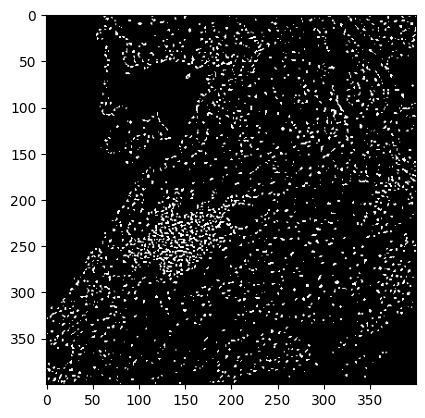

In [47]:
bin_img = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 12)
plt.imshow(bin_img, cmap="gray")

In [48]:
contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of cells {len(contours)}")

Number of cells 1901


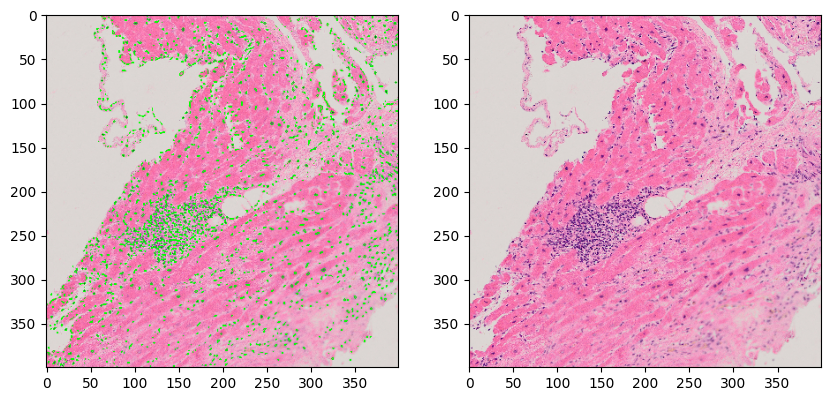

In [49]:
img_no_contours = copy.deepcopy(orig_img)
img_contours = cv2.drawContours(orig_img, contours, -1, (0, 255, 0))

fig = plt.figure(figsize=(10,20))

rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(img_contours)

fig.add_subplot(rows, columns, 2)
plt.imshow(img_no_contours)

plt.show()